In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 데이터 전처리

## 2023년 월별 데이터 병합

In [9]:
import pandas as pd
import numpy as np

# 파일 경로
file_path = "./data/2023.{}월_29개 통신정보.xlsx"

# 1월부터 9월까지의 데이터를 읽어오는 리스트 생성
dataframes = [pd.read_excel(file_path.format(month)) for month in range(1, 10)]

# 각 데이터프레임을 하나로 합치기
combined_df = pd.concat(dataframes)
combined_df['성별'] = combined_df['성별'].replace({1:'M', 2:'F'})

# 숫자 데이터만 포함하는 열 선택
# numeric_df = combined_df.select_dtypes(include=[np.number])

# 동일한 위치의 셀들을 묶어 평균을 계산
average_df = combined_df.groupby(['자치구', '성별','연령대']).mean()
average_df = average_df.reset_index()  # 계층형 인덱스 사용 안함

# 결과를 새로운 엑셀 파일로 저장
average_df.to_excel('./average.xlsx')

C:\Users\USER\AppData\Local\Temp\ipykernel_13068\2514474017.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = combined_df.groupby(['자치구', '성별','연령대']).mean()


## 남, 녀 각각 자치구별 평균 연령대를 구한다.

In [79]:
data = pd.read_excel('./average.xlsx')

data['자치구/성별 연령대 총합'] = data['연령대'] * data['총인구수']

total = data.groupby(['자치구', '성별'])['총인구수'].sum()

average_age = pd.DataFrame()

average_age['평균 연령대'] = data.groupby(['자치구', '성별'])['자치구/성별 연령대 총합'].sum() / total

total = np.ceil(total).astype(int)

average_age['총인구수'] = total 

In [80]:
average_age = average_age.reset_index()

In [81]:
average_age

,자치구,성별,평균 연령대,총인구수
0,강남구,F,43.678562,10576
1,강남구,M,43.444475,9364
2,강동구,F,45.086388,10361
3,강동구,M,43.964831,9942
4,강북구,F,46.994863,10659
5,강북구,M,45.186516,9994
6,강서구,F,44.591378,12121
7,강서구,M,43.356225,11306
8,관악구,F,43.357594,10609
9,관악구,M,41.666981,10724


In [82]:
average_age.to_excel('./average_age.xlsx')

## 자치구랑 연령대로 groupby sum 진행하고 연령대로 group by

In [45]:
data = pd.read_excel('./average.xlsx')

by_age = pd.DataFrame()

by_age['각 자치구별 연령대별 총합'] = data.groupby(['자치구', '연령대'])['총인구수'].sum()
by_age = by_age.reset_index()

by_age.to_excel('./merge_f_m.xlsx')

In [68]:
# 성별 합치지 않고 하면
data = pd.read_excel('./average.xlsx')

age_most_region_notmerged = pd.DataFrame()
age_most_region_notmerged['총 인구수'] = data.groupby(['성별', '연령대', '자치구'])['총인구수'].sum()
age_most_region_notmerged = age_most_region_notmerged.reset_index().sort_values(by=['성별','연령대'])

age_most_region_notmerged

age_most_region_notmerged.to_excel('./age_most_region_notmerged.xlsx')

,성별,연령대,자치구,총 인구수
0,F,20,강남구,779.526869
1,F,20,강동구,773.393704
2,F,20,강북구,837.259573
3,F,20,강서구,914.645722
4,F,20,관악구,1018.141005
...,...,...,...,...
595,M,75,용산구,331.868819
596,M,75,은평구,692.094792
597,M,75,종로구,231.144902
598,M,75,중구,192.215407


In [100]:
data = pd.read_excel('./merge_f_m.xlsx')

def merge_age(age):
    return int((age // 10) * 10)

age_most_region = pd.DataFrame()
age_most_region['총 인구수'] = data.groupby(['연령대', '자치구'])['각 자치구별 연령대별 총합'].mean()
age_most_region = age_most_region.reset_index().sort_values(by='연령대')
age_most_region['연령대'] = age_most_region['연령대'].apply(merge_age)

age_10 = pd.DataFrame()
age_10['총 인구수'] = age_most_region.groupby(['연령대', '자치구'])['총 인구수'].sum()
age_10 = age_10.reset_index().sort_values(by='연령대')
age_10

# age_most_region.to_excel('./age_most_region.xlsx')
age_10.to_excel('./age_10.xlsx')

,연령대,자치구,총 인구수
0,20,강남구,3426.287121
24,20,중랑구,3582.388056
23,20,중구,1351.299407
22,20,종로구,1680.708562
21,20,은평구,3851.169583
...,...,...,...
126,70,강동구,1692.535988
125,70,강남구,1593.510859
148,70,중구,799.581259
136,70,동작구,2182.606000


In [ ]:
age_region = pd.DataFrame()
age_region['총 인구수'] = data.groupby(['연령대', '자치구'])['각 자치구별 연령대별 총합'].mean()
age_region = age_most_region.reset_index().sort_values(by='연령대')

age_most_region

## 연령대로 groupby 진행해서 총인구 수 가장 많은 자치구

# 데이터 시각화

<Figure size 1000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 평균 남성 연령대')

Text(0.5, 0, '평균 연령대')

(40.0, 50.0)

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 평균 여성 연령대')

Text(0.5, 0, '평균 연령대')

(40.0, 50.0)

Text(0, 0.5, '자치구')

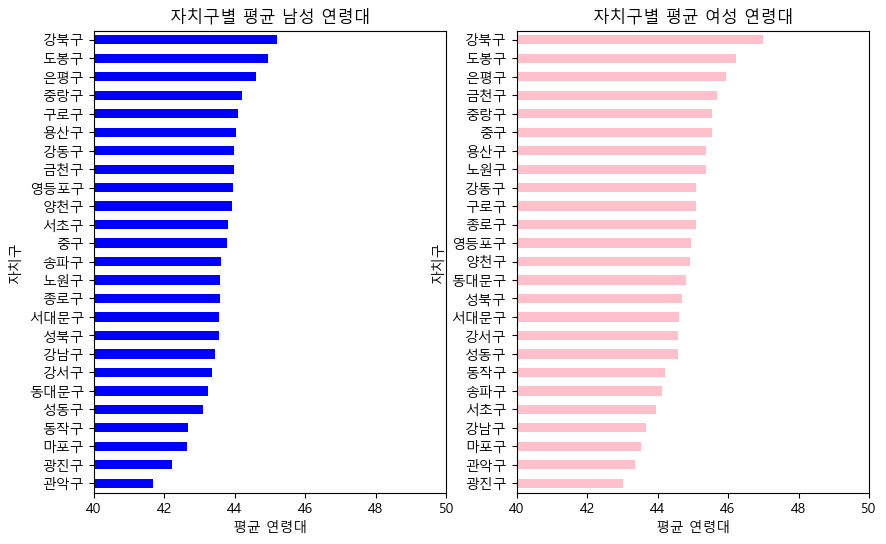

In [13]:
# 자치구별 평균 연령대 (남, 녀) 막대그래프

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
male = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
average_age_region_m = male.groupby('자치구')['평균 연령대'].mean()
average_age_region_m.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 평균 남성 연령대')
plt.xlabel('평균 연령대')
plt.xlim(40, 50)
plt.ylabel('자치구')

plt.subplot(1, 2, 2)
female = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
average_age_region_f = female.groupby('자치구')['평균 연령대'].mean()
average_age_region_f.sort_values().plot(kind='barh', color='pink')
plt.title('자치구별 평균 여성 연령대')
plt.xlabel('평균 연령대')
plt.xlim(40, 50)
plt.ylabel('자치구')

<Figure size 1000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 남성 총 인구 수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

(2000.0, 13000.0)

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 여성 총 인구 수')

Text(0.5, 0, '총인구수')

(2000.0, 13000.0)

Text(0, 0.5, '자치구')

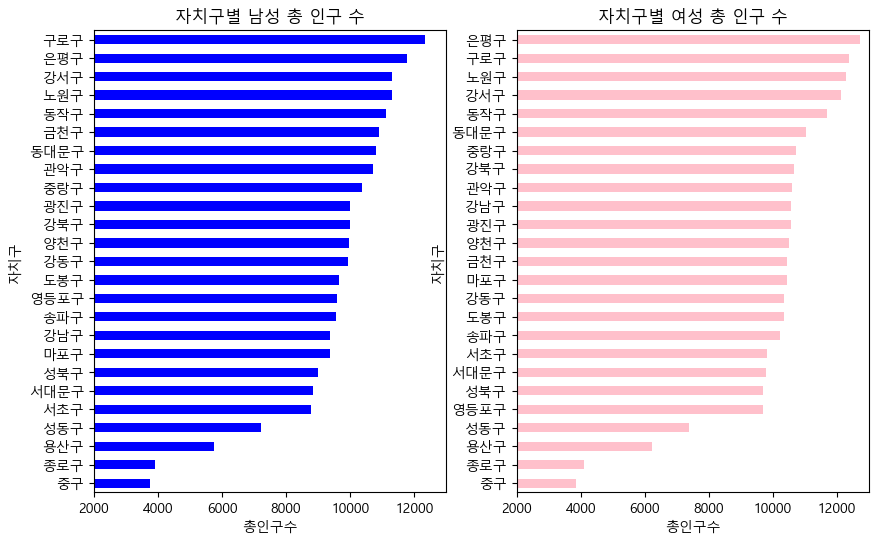

In [14]:
# 자치구별 총인구수 (남, 녀) 막대그래프

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
male = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
total_region_m = male.groupby('자치구')['총인구수'].mean()
total_region_m.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 남성 총 인구 수')
plt.xlabel('총인구수')
plt.ylabel('자치구')
plt.xlim(2000, 13000)

plt.subplot(1, 2, 2)
female = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
total_region_f = female.groupby('자치구')['총인구수'].mean()
total_region_f.sort_values().plot(kind='barh', color='pink')
plt.title('자치구별 여성 총 인구 수')
plt.xlabel('총인구수')
plt.xlim(2000, 13000)
plt.ylabel('자치구')

## 평균 연령대 지도 시각화

In [7]:
import folium
import json
import re
from folium.features import DivIcon

average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','평균 연령대'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 평균 연령대 (살)', 
).add_to(m)

m

In [8]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','평균 연령대'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 평균 연령대 (살)', 
).add_to(m)

m

## 총인구 수 지도 시각화

In [9]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'M'] # 남자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','총인구수'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 총 인구수 (명)', 
).add_to(m)

m



In [10]:
average_age = pd.read_excel('./average_age.xlsx')
data = average_age[average_age['성별'] == 'F'] # 여자 데이터만 추출한다.
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

f = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = data,
    columns = ['자치구','총인구수'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity=0.7,
    line_opacity = 1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 총 인구수 (명)', 
).add_to(f)

f

- 평균 연령대를 위에서 시각화 했을 때 자치구별 평균 연령대의 차이가 많이 나지 않기 때문에 다른 현황 분석 시각화가 필요함
- 연령별(20, 25, ..., 75)로 자치구별 총인구 수를 구해서 해당 연령대의 사람이 가장 많이 거주하는 지역을 시각화한다.

<Figure size 3000x1700 with 0 Axes>

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 20 ~ 24세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 25 ~ 29세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 30 ~ 34세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 35 ~ 39세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 40 ~ 44세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 45 ~ 49세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 50 ~ 54세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 55 ~ 59세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 60 ~ 64세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 65 ~ 69세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 70 ~ 74세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

<Axes: >

<Axes: ylabel='자치구'>

Text(0.5, 1.0, '자치구별 75 ~ 79세 총인구수')

Text(0.5, 0, '총인구수')

Text(0, 0.5, '자치구')

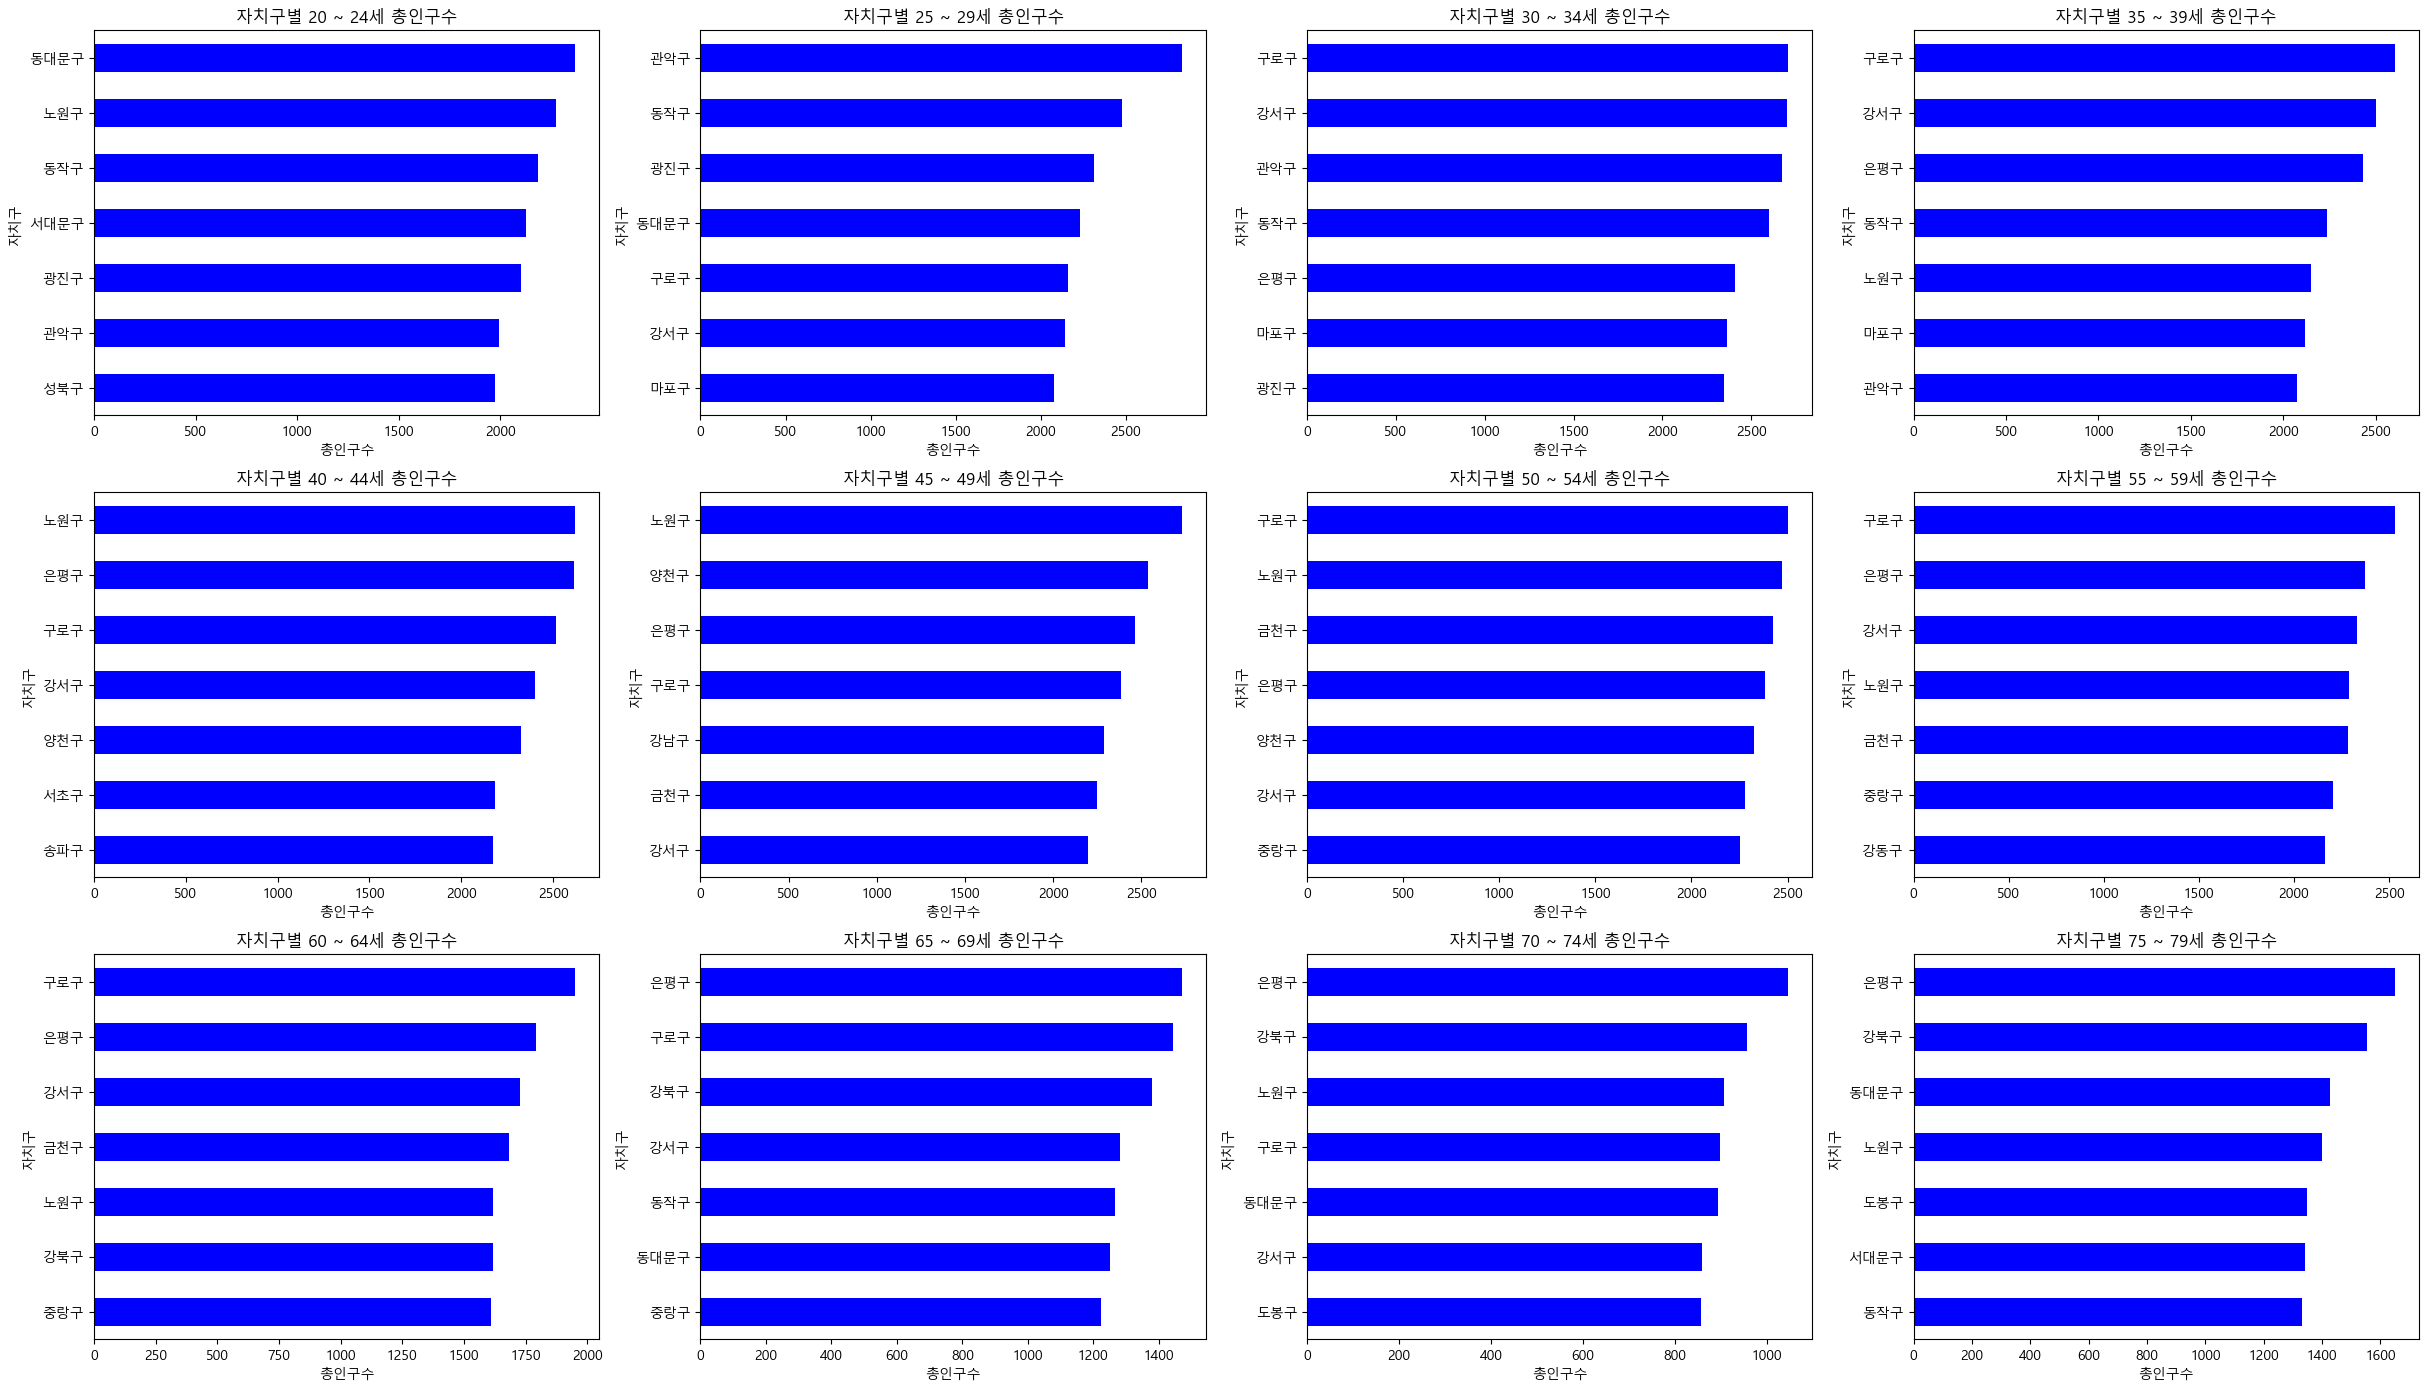

In [64]:
data = pd.read_excel('./age_most_region.xlsx')

plt.figure(figsize=(30,17))

plt.subplot(3, 4, 1)
age_20 = data[data['연령대'] == 20] # 20 ~ 24세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 20 ~ 24세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 2)
age_20 = data[data['연령대'] == 25] # 25 ~ 29세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 25 ~ 29세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 3)
age_20 = data[data['연령대'] == 30] # 30 ~ 34세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 30 ~ 34세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 4)
age_20 = data[data['연령대'] == 35] # 35 ~ 39세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 35 ~ 39세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 5)
age_20 = data[data['연령대'] == 40] # 40 ~ 44세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 40 ~ 44세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 6)
age_20 = data[data['연령대'] == 45] # 45 ~ 49세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 45 ~ 49세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 7)
age_20 = data[data['연령대'] == 50] # 50 ~ 54세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 50 ~ 54세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 8)
age_20 = data[data['연령대'] == 55] # 55 ~ 59세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 55 ~ 59세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 9)
age_20 = data[data['연령대'] == 60] # 60 ~ 64세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 60 ~ 64세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 10)
age_20 = data[data['연령대'] == 65] # 65 ~ 69세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 65 ~ 69세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 11)
age_20 = data[data['연령대'] == 70] # 70 ~ 74세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 70 ~ 74세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')

plt.subplot(3, 4, 12)
age_20 = data[data['연령대'] == 75] # 75 ~ 79세 사이의 데이터만 추출한다.
total_region_20 = age_20.groupby('자치구')['총 인구수'].mean()
total_region_20 = total_region_20.nlargest(7)
total_region_20.sort_values().plot(kind='barh', color='blue')
plt.title('자치구별 75 ~ 79세 총인구수')
plt.xlabel('총인구수')
plt.ylabel('자치구')